In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import tkinter

In [2]:
np.version.version

'1.16.2'

In [5]:
data_folder = "../data/meeting/office_full/"

In [6]:
office_data = np.loadtxt(data_folder + 'amplitude/amplitude00',delimiter=',')
office_data = np.reshape(office_data,(office_data.shape[0],180,110))

In [7]:
office_data.shape

(600, 180, 110)

In [8]:
office_data[0]

array([[103.9322 ,  99.10222,  92.86149, ...,  93.4046 ,  85.97809,
         84.82595],
       [103.9322 ,  99.10222,  92.86149, ...,  93.4046 ,  85.97809,
         84.82595],
       [103.9322 ,  99.10222,  92.86149, ...,  93.4046 ,  85.97809,
         84.82595],
       ...,
       [104.79673,  97.92835,  92.2903 , ...,  92.41867,  86.1365 ,
         82.70793],
       [104.79673,  97.92835,  92.2903 , ...,  92.41867,  86.1365 ,
         82.70793],
       [104.79673,  97.92835,  92.2903 , ...,  92.41867,  86.1365 ,
         82.70793]])

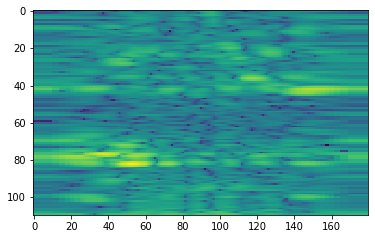

In [12]:
frame_original = office_data[120, :, :]
frame_transposed = np.flip(np.transpose(frame_original))
imgplot = plt.imshow(frame_transposed)

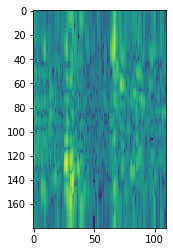

In [11]:
imgplot = plt.imshow(frame_original)

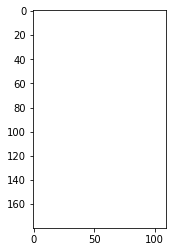

In [41]:
matplotlib.use('TkAgg')
ims = []
fig = plt.figure()
for i in range(600):
    im = plt.imshow(office_data[i, :, :])
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=13, blit=True,
                                repeat_delay=1000)
plt.show()

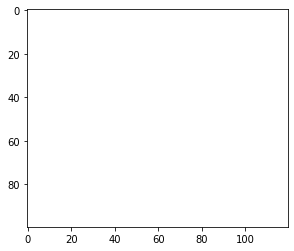

In [35]:
fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()

In [8]:
# Additionally you can transform the data into phase and amplitude data with
# these functions.
def calculate_phase(raw_data, bin=2):
    """Calculate phase from raw radar data sample.
    Phase information tells about
    target micromovements"""
    s = np.array(raw_data)
    S = np.fft.fft(s)
    ph = np.angle(S)
    phase = ph[bin]
    return phase

#phase is total range for 2 way trip?

def calculate_phases(raw_data, start=1, end=6):
    """Calculate phases from raw radar data sample
    and return multiple bins. Phase information tells about
    target micromovements"""
    s = np.array(raw_data)
    S = np.fft.fft(s)
    ph = np.angle(S)
    return ph[start:end]

def calculate_amplitude(raw_data, bin=2):
    """Calculate amplitude from raw radar data sample.
    Amplitude depends on the target size."""
    s = np.array(raw_data)
    S = np.fft.fft(s)
    amplitude = np.abs(S)
    return amplitude


In [9]:
workplace = pd.read_csv('data/workplace.csv')

In [11]:
workplace.shape

(241370, 526)